### Задача 1

Что выведет этот код?

Ответом на эту задачу является выведенное число, округлённое до 4го знака, дробная часть отделяется **точкой**.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_data, y_data = load_breast_cancer(return_X_y=True)

print(cross_val_score(RandomForestClassifier(criterion='entropy', n_estimators=42, random_state=42), X_data, y_data, cv=3).mean())

0.964847303444


### Задача 2

Напишите свою функцию определения качества модели по следующей метрике: максимальный precision, при условии, что $precision < 1.5 * recall$ и $recall > 0.5$ и определите наилучшее её значение, перебирая гиперпараметры по предложенной сетке

Ответом на эту задачу является максимальное значение качества по предложенной метрике, округлённое до 4го знака, дробная часть отделяется **точкой**.

пусть классификатор устроен как [a(x) - b], т.е. 1 если a(x) > b и 0 иначе. Тогда для каждого значения b можно найти precision и recall. Среди всех порогов, при которых precision < 1.5∗recall и recall > 0.5 нужно выбрать такой, чтобы precision был наибольшим. Значение этого precision-а и есть целевая метрика.

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 5, 10, 15, 20],
    'criterion': ['entropy', 'gini']
}

X_data, y_data = load_breast_cancer(return_X_y=True)

estimator = RandomForestClassifier(random_state=42)

print('Accuracy best params and score')
result = GridSearchCV(estimator, param_grid, cv=3, scoring='accuracy').fit(X_data, y_data)
print('\tParams:', result.best_params_)
print('\tScore:', result.best_score_)

Accuracy best params and score
	Params: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}
	Score: 0.964850615114


In [5]:
from sklearn.metrics import precision_score, recall_score

In [6]:
def customScorer(y_true, y_pred):
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    
    if prec < 1.5 * rec and rec > 0.5:
        return prec
    else:
        return 0


In [8]:
scorer = make_scorer(customScorer)

print('Custom loss best params and score')
result = GridSearchCV(estimator, param_grid, cv=3, scoring=scorer).fit(X_data, y_data)
print('\tParams:', result.best_params_)
print('\tScore:', result.best_score_)

Custom loss best params and score
	Params: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 10}
	Score: 0.968819611066


### Задача 3

Какова минимальная сторона квадрата с параллельными осям сторонами, содержащего все точки из $X$? 

Ответом на эту задачу является число, округлённое до 2го знака, дробная часть отделяется точкой.

In [9]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data[:, :2]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

X определяется в клетке ниже. Он является набором пар координат, т.е. это точки на плоскости. Нужно найти минимальный размер стороны квадрата, который можно нарисовать на этой плоскости, и он покроет все точки из Х.

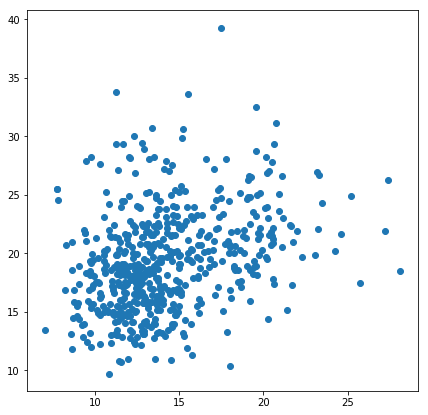

In [18]:
plt.figure(figsize=(7, 7))
plt.plot(X[:, 0], X[:, 1], "o")

In [25]:
max(X[:, 0]) - min(X[:, 0])

21.128999999999998

In [24]:
max(X[:, 1]) - min(X[:, 1])

29.57

Какова вероятность выбросить 8 и больше орлов из 10 бросков монеты? Ответ округлите до 3 знака

In [38]:
import scipy.special
prob = 0
for i in (8, 9, 10):
    prob += scipy.special.binom(10, i) * (1/2)**10
prob

0.0546875

Какова вероятность выбросить 53 и больше орлов из 100 бросков монеты? Ответ округлите до 3 знака

In [40]:
prob = 0
for i in range(53, 101):
    prob += scipy.special.binom(100, i) * (1/2)**100
prob

0.30864970679462606